In [1]:
#from maxcut import maxcut_SA
import QUBO

In [2]:
import numpy as np

N = 5
E = 6

A = np.array([[0, 1, 1, 0, 0],
             [1, 0, 0, 1, 1],
             [1, 0, 0, 1, 0],
             [0, 1, 1, 0, 1],
             [0, 1, 0, 1, 0]])

Q = QUBO.AtoQ(A)
print(Q)

newQ = QUBO.modQ(Q)
print(newQ)


[[-2  2  2  0  0]
 [ 0 -3  0  2  2]
 [ 0  0 -2  2  0]
 [ 0  0  0 -3  2]
 [ 0  0  0  0 -2]]
[[-2  2  2  0  0]
 [ 2 -3  0  2  2]
 [ 2  0 -2  2  0]
 [ 0  2  2 -3  2]
 [ 0  2  0  2 -2]]


In [4]:
init_heat = 0
heat_max = 10
delta_heat = 2e-3

best_E, x_best = QUBO.qubo_SA(newQ, init_heat, heat_max, delta_heat)

print("best_E", best_E)
print("x_best", x_best)

v_best = x_best*2 - 1
print("v_best", v_best)
max_cut = np.sum(np.sum(np.multiply(A, 1 - v_best.T@v_best)))/4
print("max_cut", max_cut)

best_E -5.0
x_best [[ True False False  True  True]]
v_best [[ 1 -1 -1  1  1]]
max_cut 5.0


Number of Nodes =  800
Number of Edges =  4661


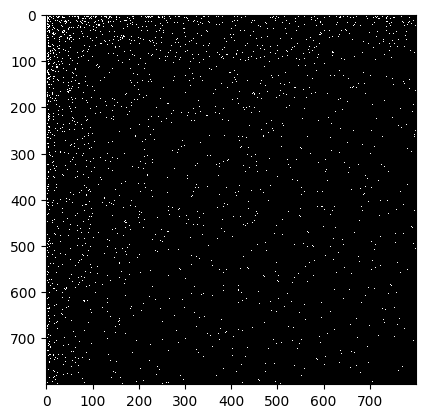

In [5]:
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

graph_path = './G15.txt'

data = np.loadtxt(graph_path, skiprows=0, max_rows=1, dtype=int)
N = data[0]
E = data[1]
print('Number of Nodes = ', N)
print('Number of Edges = ', E)

data = np.loadtxt(graph_path, skiprows=1, dtype=int)
#print(N = data[0,0])
#E = data[0,1]
col = data[:,1].T - 1
row = data[:,0].T - 1
Aij = data[:,2].T
A = coo_matrix((Aij,(row,col)), shape=(N, N), dtype=int)
A = A.toarray()
A = A + A.T 
plt.imshow(-A,cmap='Greys',interpolation='nearest')   

In [8]:
Q = QUBO.AtoQ(A)
best_E, x_best = QUBO.qubo_SA(Q, 0, 10000, 2e-3)

print("best_E", best_E)
#print("x_best", x_best)

v_best = x_best*2 - 1
#print("v_best", v_best)
max_cut = np.sum(np.sum(np.multiply(A, 1 - v_best.T@v_best)))/4
print("max_cut", max_cut)

best_E -3047.0
max_cut 3047.0
